## Homework

This week we are going to use a new data set which contains 1070 purchases where the customer either purchased Citrus Hill or Minute Maid Orange Juice. 

In [1]:
from __future__ import print_function
import pandas as pd
oj_df = pd.read_csv('data/OJ.csv')
print(oj_df.shape)
oj_df.head()

(1070, 18)


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,0,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,0,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,1,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,0,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [2]:
oj_input_df = oj_df.loc[:, oj_df.columns[1:]]
oj_target_srs = oj_df['Purchase']

The features and the target variable are already prepared for you. What you are going to do is:

**1. Split**

Split the data set into two parts: training set and test set (with <code>random_state=0</code>, and <code>test_size=0.5</code>).


In [3]:
### your solution
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(oj_input_df, oj_target_srs, random_state=0, test_size=0.5)

**2. Support vector machine**

(1) Fit a svm model on the training set, report the training error and test error. (Just use the <code>svm.SVC</code> with default setting.)
    
(2) Change the value of parameter $C$ from $10^{-3}$ to $10^3$, make a plot to watch how the training error and test error varies. You can choose the value of $C$ from the array `np.logspace(-3, 3, 300)`.

The training error is: 0.22617
The test     error is: 0.30280
---------------------------------------------------------------------------
CPU times: user 13.1 s, sys: 311 ms, total: 13.5 s
Wall time: 14 s
{'C': 45.239562325380582}


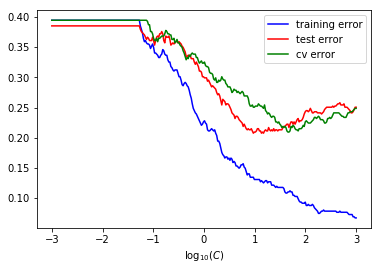

In [4]:
### your solution
def get_error(x_train, y_train, x_test, y_test, model, show=True):
    model.fit(x_train, y_train)
    train_error = 1 - model.score(x_train, y_train)
    test_error = 1 - model.score(x_test, y_test)
    if show:
        print("The training error is: %.5f" %train_error)
        print("The test     error is: %.5f" %test_error)
    return [train_error, test_error]

# (1)
from sklearn import svm
svm_model = svm.SVC()
get_error(train_data, train_target, test_data, test_target, svm_model)

print('-'*75)

#(2)
import numpy as np
C = np.logspace(start=-3, stop=3, num=300)
svm_train = []
svm_test = []
for i in C:
    svm_model.set_params(C=i)
    error = get_error(train_data, train_target, test_data, test_target, svm_model, show=False)
    svm_train.append(error[0])
    svm_test.append(error[1])

    
# Let's use grid_search and compare the result
from sklearn.model_selection import GridSearchCV
grid_para_svm = {'C': np.logspace(start=-3, stop=3, num=300)}
grid_search_svm = GridSearchCV(svm_model, grid_para_svm)
%time grid_search_svm.fit(train_data, train_target)
print(grid_search_svm.best_params_)
# Cross-validation mean test score gives us a better estimate of the test error
# than the training error we calculated
scores = np.array([1 - mts for mts in grid_search_svm.cv_results_['mean_test_score']])
#####################################################################    

import matplotlib.pyplot as plt
plt.plot(np.log10(C), svm_train, c='blue', label='training error')
plt.plot(np.log10(C), svm_test, c='red', label='test error')
plt.plot(np.log10(C), scores, c='green', label='cv error')
plt.legend()
plt.xlabel('$\log_{10}(C)$')
plt.show()

**3. Decision tree**

(1) Fit a decision tree model on the training set with the default setting.

In [5]:
grid_para_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31)
}

In [6]:
### your solution
# (1)
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
get_error(train_data, train_target, test_data, test_target, tree_model)

The training error is: 0.00748
The test     error is: 0.22430


[0.0074766355140186702, 0.22429906542056077]

(2) Set the depth of the tree from 1 to 30. Look the varies of the training error and test error.

Populating the interactive namespace from numpy and matplotlib


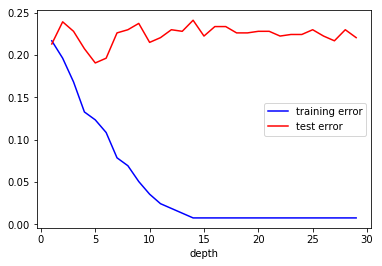

In [7]:
# (2)
depth  = range(1, 30)
tree_train = []
tree_test = []
for i in depth:
    tree_model.set_params(max_depth = i)
    error = get_error(train_data, train_target, test_data, test_target, tree_model, show=False)
    tree_train.append(error[0])
    tree_test.append(error[1])

%pylab inline
import matplotlib.pyplot as pl
pl.plot(depth, tree_train, c='blue', label='training error')
pl.plot(depth, tree_test, c='red', label='test error')
pl.legend(loc=7)
pl.xlabel('depth')
pl.show()

# The plot below indicates depth = 5 results in the lowest test error

(3) Use the function <code>grid_search.GridSearchCV</code> to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. The possible combination of the parameters may be:

In [8]:
# (3)
from sklearn.model_selection import GridSearchCV

grid_para_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31)
}
grid_search_tree = GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='accuracy').fit(train_data, train_target)
print('The best params are %s' % grid_search_tree.best_params_)
print('The best score is %.4f' % grid_search_tree.best_score_)
print('The training error is %.4f' % (1 - grid_search_tree.best_estimator_.score(train_data, train_target)))
print('The testing error is %.4f' % (1 - grid_search_tree.best_estimator_.score(test_data, test_target)))

The best params are {'criterion': 'entropy', 'max_depth': 3}
The best score is 0.8150
The training error is 0.1757
The testing error is 0.2206


(4) What are the first 5 important features?

In [9]:
# (4)
feature_importance_srs = pd.Series(
    data=grid_search_tree.best_estimator_.feature_importances_,
    index=oj_input_df.columns)
feature_importance_srs.sort_values(inplace=True, ascending=False)
feature_importance_srs.head()

LoyalCH           0.799406
PriceDiff         0.114697
SalePriceCH       0.033513
SpecialCH         0.028323
WeekofPurchase    0.024061
Store7            0.000000
PctDiscMM         0.000000
SalePriceMM       0.000000
ListPriceDiff     0.000000
SpecialMM         0.000000
PctDiscCH         0.000000
DiscMM            0.000000
DiscCH            0.000000
PriceMM           0.000000
PriceCH           0.000000
StoreID           0.000000
STORE             0.000000
dtype: float64

**4. Random Forest.**

(1) Fit a random forest on the training set. Report the training error and test error.

In [10]:
grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

In [11]:
### your solution
# (1)
from sklearn import ensemble
random_forest = ensemble.RandomForestClassifier()
get_error(train_data, train_target, test_data, test_target, random_forest)

The training error is: 0.02991
The test     error is: 0.22056


[0.029906542056074792, 0.22056074766355138]

(2) Use the function <code>grid_search.GridSearchCV</code> to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. The possible combination of the parameters may be:

In [12]:
# (2)
grid_para_forest = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31), "n_estimators": range(10, 110, 10)}
grid_search_forest = GridSearchCV(random_forest, grid_para_forest, cv=5, scoring='accuracy')
grid_search_forest = grid_search_forest.fit(train_data, train_target)

print('The best score is %.4f' %grid_search_forest.best_score_)
print('The best parameters are %s' %grid_search_forest.best_params_)
print('The training error is %.4f' %(1 - grid_search_forest.best_estimator_.score(train_data, train_target)))
print('The testing error is %.4f' %(1 - grid_search_forest.best_estimator_.score(test_data, test_target)))

The best score is 0.8206
The best parameters are {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}
The training error is 0.1626
The testing error is 0.1907


(3) What's the first 5 important features?

In [13]:
# (3)
feature_importance_srs = pd.Series(
    data=grid_search_forest.best_estimator_.feature_importances_,
    index=oj_input_df.columns)
feature_importance_srs.sort_values(inplace=True, ascending=False)
feature_importance_srs.head()

LoyalCH           0.416427
StoreID           0.102696
PriceDiff         0.077236
ListPriceDiff     0.072408
WeekofPurchase    0.058026
dtype: float64